# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [13]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [14]:
baby_names = pd.read_csv('lab12_files/US_Baby_Names_right.csv')

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [15]:
baby_names.dtypes

print(len(baby_names))

1016395


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [16]:
baby_names[0:10]

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [18]:
baby_names = baby_names.drop(["Id", "Unnamed: 0"], axis=1)

Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [19]:
m = (baby_names["Gender"] == 'M').sum()
f = (baby_names["Gender"] == 'F').sum()

'wiecej kobiet' if m < f else 'wiecej mezczyzn'

'wiecej kobiet'

Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [28]:
q1 = baby_names.groupby('Name', sort=True)
q1.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1004923,Gryffin,2014,M,WI,5
1004950,Kroy,2014,M,WI,5
1004973,Owyn,2014,M,WI,5
1005707,Haylea,2005,F,WV,5


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

<AxesSubplot: xlabel='Name'>

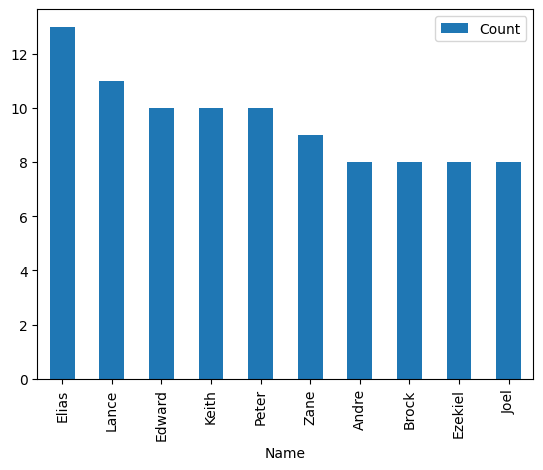

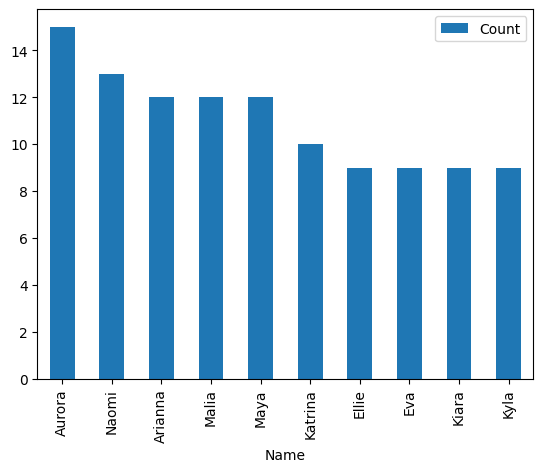

In [39]:
# q1.head(10).plot(x='Name', y='Count', kind = 'bar')

q1.filter(lambda x: (x['Gender'] == 'M').all()).head(10).plot(x='Name', y='Count', kind='bar')
q1.filter(lambda x: (x['Gender'] == 'F').all()).head(10).plot(x='Name', y='Count', kind='bar')



Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [44]:
baby_names['Name'].nunique()

17632

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [45]:
import numpy as np

def sample(num_values):
    q1 = baby_names.groupby('Name')
    q2 = q1.count()['Count'].sort_values(ascending=False)[:10]
    q2 = pd.DataFrame({'names': q2.index, 'count':q2.values})
    uniques = list(q2['names'])
    sum_uniques = q2['count'].sum()
    q2['count'] /= sum_uniques
    distribution = list(q2['count'])
    return np.random.choice(a=uniques, size = num_values, p=distribution)

print(sample(100))



['Taylor' 'Payton' 'Taylor' 'Jayden' 'Peyton' 'Jordan' 'Avery' 'Hayden'
 'Angel' 'Alexis' 'Jayden' 'Hayden' 'Payton' 'Payton' 'Jordan' 'Taylor'
 'Peyton' 'Payton' 'Alexis' 'Hayden' 'Jordan' 'Peyton' 'Riley' 'Avery'
 'Hayden' 'Jayden' 'Jordan' 'Jordan' 'Hayden' 'Hayden' 'Payton' 'Hayden'
 'Hayden' 'Riley' 'Angel' 'Angel' 'Hayden' 'Hayden' 'Avery' 'Alexis'
 'Peyton' 'Payton' 'Alexis' 'Taylor' 'Taylor' 'Taylor' 'Jayden' 'Payton'
 'Taylor' 'Alexis' 'Alexis' 'Alexis' 'Taylor' 'Angel' 'Riley' 'Payton'
 'Taylor' 'Jordan' 'Angel' 'Riley' 'Jayden' 'Taylor' 'Angel' 'Peyton'
 'Riley' 'Payton' 'Angel' 'Jordan' 'Jordan' 'Avery' 'Jayden' 'Peyton'
 'Alexis' 'Jayden' 'Alexis' 'Peyton' 'Jordan' 'Peyton' 'Jordan' 'Avery'
 'Alexis' 'Peyton' 'Jordan' 'Avery' 'Jordan' 'Avery' 'Alexis' 'Peyton'
 'Payton' 'Jayden' 'Payton' 'Jordan' 'Riley' 'Hayden' 'Peyton' 'Taylor'
 'Hayden' 'Hayden' 'Hayden' 'Peyton']


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [57]:
print(baby_names['Name'].value_counts().idxmax())

print(q1['Count'].mean())
print(q1['Count'].std())



Riley
Name
Aaban       6.000000
Aadan       5.750000
Aadarsh     5.000000
Aaden      17.479592
Aadhav      6.000000
             ...    
Zyra        6.000000
Zyrah       5.500000
Zyren       6.000000
Zyria       5.900000
Zyriah      6.444444
Name: Count, Length: 17632, dtype: float64
Name
Aaban       0.000000
Aadan       0.957427
Aadarsh          NaN
Aaden      21.154974
Aadhav           NaN
             ...    
Zyra        1.154701
Zyrah       0.707107
Zyren            NaN
Zyria       0.737865
Zyriah      1.666667
Name: Count, Length: 17632, dtype: float64


## Część II

Krok 1: Wczytaj dane

In [65]:
occupations = pd.read_csv('lab12_files/ocupation.csv', sep='|')
print(occupations)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


Krok 2: Podejrzyj pierwsze 25 rekordów

In [59]:
occupations.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [60]:
occupations.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [61]:
print(len(occupations))
print(len(occupations.columns))

943
5


Krok 5: Wypisz nazwy kolumn

In [62]:
occupations.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

Krok 6: Ile różnych zawodów jest w zbiorze?

In [67]:
occupations['occupation'].nunique()

21

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

<AxesSubplot: ylabel='occupation'>

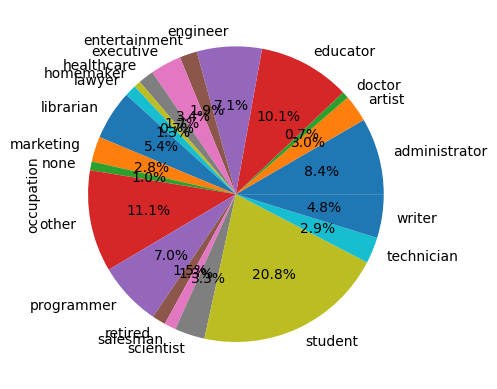

In [201]:
import matplotlib.pyplot as plt

alll = occupations.groupby(['occupation'])['occupation'].count()

others = alll.index.difference(alll.nlargest(10).index)

grouped = alll.loc[~alll.index.isin(others)]
grouped['others'] = alll.loc[alll.index.isin(others)].sum()

alll.plot.pie(autopct='%1.1f%%')


<AxesSubplot: ylabel='occupation'>

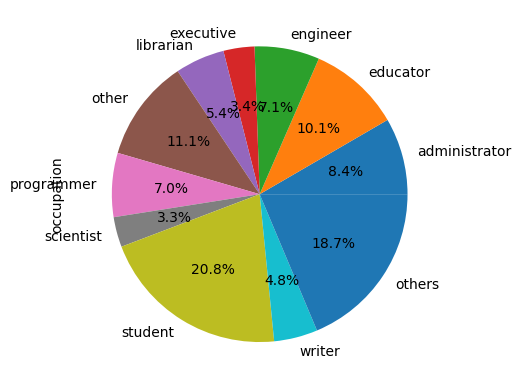

In [202]:
grouped.plot.pie(autopct='%1.1f%%')


Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

<AxesSubplot: xlabel='occupation'>

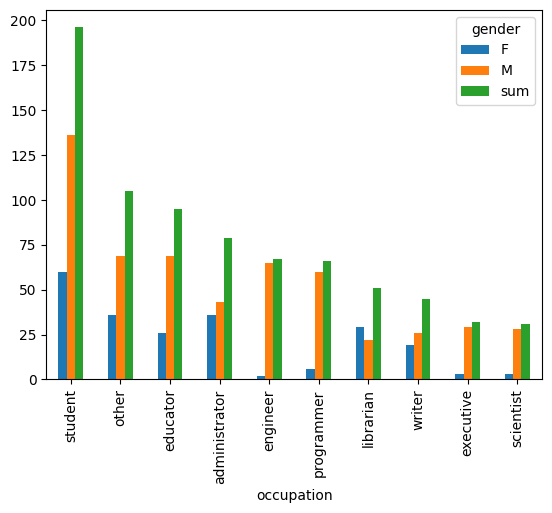

In [180]:
d = occupations.groupby(['occupation', 'gender'])['occupation'].count().unstack('gender')
d['sum'] = d['F'] + d['M']

d.nlargest(10, columns='sum').plot(kind='bar')

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

<AxesSubplot: xlabel='occupation'>

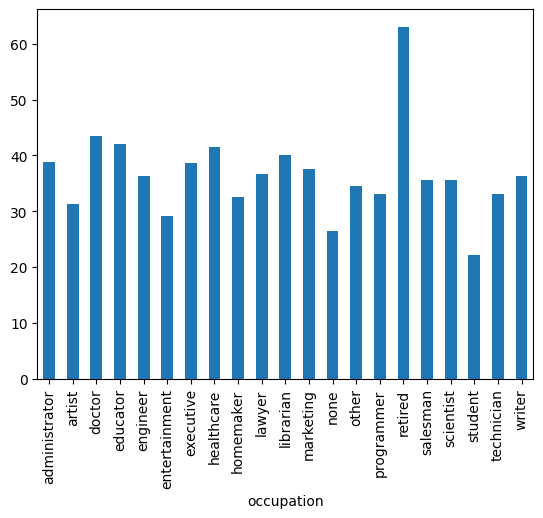

In [118]:
occupations.groupby('occupation')['age'].mean().plot(kind='bar')

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

<AxesSubplot: xlabel='occupation'>

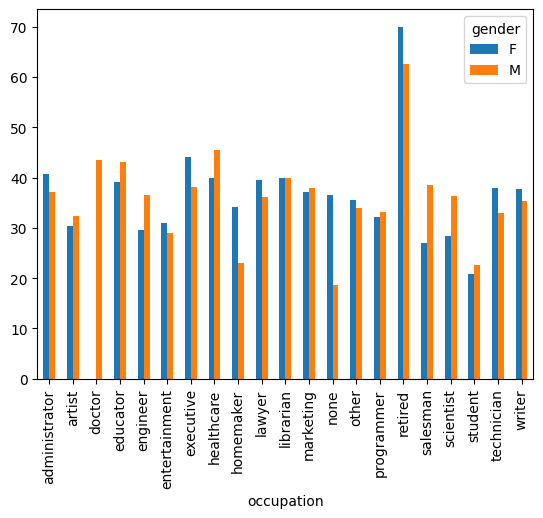

In [119]:
occupations.groupby(['occupation', 'gender'])['age'].mean().unstack('gender').plot(kind='bar')